In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
# ! pip install pgmpy

In [3]:
import pandas as pd
import numpy as np

In [65]:
date_set_path = "../temp_sets/"

## Time data discretisation

In [4]:
def date_discretisation(date):
    if not pd.isna(date):
        # Do not use "-" as connector, because Pandas might read it as date or time!!
        return str(date.quarter) + "&" + str(date.dayofweek)
    else:
        return "Na"

In [5]:
def datetime_discretisation(date):
    if not pd.isna(date):
        # Do not use "-" as connector, because Pandas might read it as date or time!!
        return str(date.quarter) + "&" + str(date.dayofweek) + "&" + str(date.hour)
    else:
        return "Na"

In [6]:
date = pd.to_datetime('10/27/2044')

In [7]:
date_discretisation(date)

'4&3'

In [8]:
date.day_of_week

3

## Read Tempdatasets

In [9]:
# read csv file as dataframe, and drop ROW_ID column
def read_csv_no_rowid(file_path):
    df = pd.read_csv(file_path)
    df.drop(["Unnamed: 0", 'row_id'], axis=1, inplace=True)

    return df

In [10]:
# check NaN value

def nan_count(df):
    print("Total columns: " + str(len(df.columns)))
    print("Total rows: " + str(len(df)))
    print("--------------")
    print(df.isnull().sum())

### Patients

In [11]:
random_patients_df = read_csv_no_rowid(date_set_path+"patients.csv")

In [12]:
# Drop useless colums
random_patients_df.drop(['dod', 'expire_flag'], axis=1, inplace=True)

In [13]:
# Transfer some date type

random_patients_df['dob'] = pd.to_datetime(random_patients_df['dob'])
# random_patients_df['DOD'] = pd.to_datetime(random_patients_df['DOD'])
random_patients_df['dod_hosp'] = pd.to_datetime(random_patients_df['dod_hosp'])
random_patients_df['dod_ssn'] = pd.to_datetime(random_patients_df['dod_ssn'])

In [14]:
nan_count(random_patients_df)

Total columns: 5
Total rows: 1000
--------------
subject_id      0
gender          0
dob             0
dod_hosp      774
dod_ssn       702
dtype: int64


In [15]:
random_patients_df.loc[:, 'dob'] = random_patients_df.loc[:, 'dob'].apply(date_discretisation)
random_patients_df.loc[:, 'dod_hosp'] = random_patients_df.loc[:, 'dod_hosp'].apply(date_discretisation)
random_patients_df.loc[:, 'dod_ssn'] = random_patients_df.loc[:, 'dod_ssn'].apply(date_discretisation)

In [16]:
# random_patients_df['dob'].fillna(value=nan_time, inplace=True)
# random_patients_df['dod_hosp'].fillna(value=nan_time, inplace=True)
# random_patients_df['dod_ssn'].fillna(value=nan_time, inplace=True)

In [17]:
nan_count(random_patients_df)

Total columns: 5
Total rows: 1000
--------------
subject_id    0
gender        0
dob           0
dod_hosp      0
dod_ssn       0
dtype: int64


### Admissions

Note: the 'deathtime' in admission table cannot be dropped, as this column includes the exact time.

In [18]:
admissions_sample_df = read_csv_no_rowid(date_set_path+"admissions.csv")

In [19]:
admissions_sample_df.drop(['diagnosis', 'hospital_expire_flag'], axis=1, inplace=True)

In [20]:
admissions_sample_df['admittime'] = pd.to_datetime(admissions_sample_df['admittime'])
admissions_sample_df['dischtime'] = pd.to_datetime(admissions_sample_df['dischtime'])
admissions_sample_df['deathtime'] = pd.to_datetime(admissions_sample_df['deathtime'])
admissions_sample_df['edregtime'] = pd.to_datetime(admissions_sample_df['edregtime'])
admissions_sample_df['edouttime'] = pd.to_datetime(admissions_sample_df['edouttime'])

In [21]:
admissions_sample_df.dtypes

subject_id                       int64
hadm_id                          int64
admittime               datetime64[ns]
dischtime               datetime64[ns]
deathtime               datetime64[ns]
admission_type                  object
admission_location              object
discharge_location              object
insurance                       object
language                        object
religion                        object
marital_status                  object
ethnicity                       object
edregtime               datetime64[ns]
edouttime               datetime64[ns]
has_chartevents_data             int64
dtype: object

In [22]:
admissions_sample_df.loc[:, 'admittime'] = admissions_sample_df.loc[:, 'admittime'].apply(datetime_discretisation)
admissions_sample_df.loc[:, 'dischtime'] = admissions_sample_df.loc[:, 'dischtime'].apply(datetime_discretisation)
admissions_sample_df.loc[:, 'deathtime'] = admissions_sample_df.loc[:, 'deathtime'].apply(datetime_discretisation)
admissions_sample_df.loc[:, 'edregtime'] = admissions_sample_df.loc[:, 'edregtime'].apply(datetime_discretisation)
admissions_sample_df.loc[:, 'edouttime'] = admissions_sample_df.loc[:, 'edouttime'].apply(datetime_discretisation)

In [23]:
admissions_sample_df['language'].fillna(value='unknow', inplace=True)
admissions_sample_df['marital_status'].fillna(value='unknow', inplace=True)
admissions_sample_df['religion'].fillna(value='unknow', inplace=True)
# admissions_sample_df['deathtime'].fillna(value=nan_time, inplace=True)
# admissions_sample_df['edregtime'].fillna(value=nan_time, inplace=True)
# admissions_sample_df['edouttime'].fillna(value=nan_time, inplace=True)

In [24]:
nan_count(admissions_sample_df)

Total columns: 16
Total rows: 1289
--------------
subject_id              0
hadm_id                 0
admittime               0
dischtime               0
deathtime               0
admission_type          0
admission_location      0
discharge_location      0
insurance               0
language                0
religion                0
marital_status          0
ethnicity               0
edregtime               0
edouttime               0
has_chartevents_data    0
dtype: int64


### Callout

In [25]:
callout_sample_df = read_csv_no_rowid(date_set_path+"callout.csv")

In [26]:
callout_sample_df.drop(['submit_careunit', 'firstreservationtime', 'currentreservationtime'], axis=1, inplace=True)

In [27]:
callout_sample_df['createtime'] = pd.to_datetime(callout_sample_df['createtime'])
callout_sample_df['updatetime'] = pd.to_datetime(callout_sample_df['updatetime'])
callout_sample_df['acknowledgetime'] = pd.to_datetime(callout_sample_df['acknowledgetime'])
callout_sample_df['outcometime'] = pd.to_datetime(callout_sample_df['outcometime'])

In [28]:
callout_sample_df.loc[:, 'createtime'] = callout_sample_df.loc[:, 'createtime'].apply(datetime_discretisation)
callout_sample_df.loc[:, 'updatetime'] = callout_sample_df.loc[:, 'updatetime'].apply(datetime_discretisation)
callout_sample_df.loc[:, 'acknowledgetime'] = callout_sample_df.loc[:, 'acknowledgetime'].apply(datetime_discretisation)
callout_sample_df.loc[:, 'outcometime'] = callout_sample_df.loc[:, 'outcometime'].apply(datetime_discretisation)

In [29]:
callout_sample_df['discharge_wardid'].fillna(value=100, inplace=True)
# callout_sample_df['acknowledgetime'].fillna(value=nan_time, inplace=True)

In [30]:
nan_count(callout_sample_df)

Total columns: 20
Total rows: 807
--------------
subject_id            0
hadm_id               0
submit_wardid         0
curr_wardid           0
curr_careunit         0
callout_wardid        0
callout_service       0
request_tele          0
request_resp          0
request_cdiff         0
request_mrsa          0
request_vre           0
callout_status        0
callout_outcome       0
discharge_wardid      0
acknowledge_status    0
createtime            0
updatetime            0
acknowledgetime       0
outcometime           0
dtype: int64


### ICUstays

In [31]:
icustays_sample_df = read_csv_no_rowid(date_set_path+"icustays.csv")

In [32]:
icustays_sample_df.drop(['los'], axis=1, inplace=True)

In [33]:
icustays_sample_df['intime'] = pd.to_datetime(icustays_sample_df['intime'])
icustays_sample_df['outtime'] = pd.to_datetime(icustays_sample_df['outtime'])

In [34]:
icustays_sample_df.loc[:, 'intime'] = icustays_sample_df.loc[:, 'intime'].apply(datetime_discretisation)
icustays_sample_df.loc[:, 'outtime'] = icustays_sample_df.loc[:, 'outtime'].apply(datetime_discretisation)

In [35]:
nan_count(icustays_sample_df)

Total columns: 10
Total rows: 1342
--------------
subject_id        0
hadm_id           0
icustay_id        0
dbsource          0
first_careunit    0
last_careunit     0
first_wardid      0
last_wardid       0
intime            0
outtime           0
dtype: int64


---

## Combine samples

In [36]:
patients_df = pd.merge(random_patients_df, admissions_sample_df, on=['subject_id'], how='inner')

In [37]:
patients_df = pd.merge(patients_df, callout_sample_df, on=['subject_id', 'hadm_id'], how='inner')

In [38]:
patients_df = pd.merge(patients_df, icustays_sample_df, on=['subject_id', 'hadm_id'], how='inner')

In [39]:
patients_df.columns

Index(['subject_id', 'gender', 'dob', 'dod_hosp', 'dod_ssn', 'hadm_id',
       'admittime', 'dischtime', 'deathtime', 'admission_type',
       'admission_location', 'discharge_location', 'insurance', 'language',
       'religion', 'marital_status', 'ethnicity', 'edregtime', 'edouttime',
       'has_chartevents_data', 'submit_wardid', 'curr_wardid', 'curr_careunit',
       'callout_wardid', 'callout_service', 'request_tele', 'request_resp',
       'request_cdiff', 'request_mrsa', 'request_vre', 'callout_status',
       'callout_outcome', 'discharge_wardid', 'acknowledge_status',
       'createtime', 'updatetime', 'acknowledgetime', 'outcometime',
       'icustay_id', 'dbsource', 'first_careunit', 'last_careunit',
       'first_wardid', 'last_wardid', 'intime', 'outtime'],
      dtype='object')

In [40]:
nan_count(patients_df)

Total columns: 46
Total rows: 992
--------------
subject_id              0
gender                  0
dob                     0
dod_hosp                0
dod_ssn                 0
hadm_id                 0
admittime               0
dischtime               0
deathtime               0
admission_type          0
admission_location      0
discharge_location      0
insurance               0
language                0
religion                0
marital_status          0
ethnicity               0
edregtime               0
edouttime               0
has_chartevents_data    0
submit_wardid           0
curr_wardid             0
curr_careunit           0
callout_wardid          0
callout_service         0
request_tele            0
request_resp            0
request_cdiff           0
request_mrsa            0
request_vre             0
callout_status          0
callout_outcome         0
discharge_wardid        0
acknowledge_status      0
createtime              0
updatetime              0
acknowledgetime

In [41]:
# patients_df = pd.merge(patients_df, services_sample_df, on=['subject_id', 'hadm_id'], how='outer')
# patients_df = pd.merge(patients_df, transfers_sample_df.drop(['icustay_id', 'dbsource', 'curr_careunit', 'curr_wardid', \
#                                                 'intime', 'outtime', 'los'], axis=1), on=['subject_id', 'hadm_id'], how='outer')
# patients_df.fillna(value="Na", inplace=True)

In [42]:
patients_df.to_csv("patients_info.csv")

In [43]:
patients_df.drop(['subject_id', 'hadm_id'], axis=1, inplace=True)

---

##  Build Network

In [44]:
from sdv import Metadata
from sdv.relational import HMA1

In [45]:
patients_tables = {
    'random_patients_df': random_patients_df,
    'admissions_sample_df': admissions_sample_df,
    'callout_sample_df': callout_sample_df,
    'icustays_sample_df': icustays_sample_df
}

In [46]:
metadata = Metadata()

In [47]:
metadata.add_table(name='random_patients_df', data=patients_tables['random_patients_df'], primary_key='subject_id')
metadata.add_table(name='admissions_sample_df', data=patients_tables['admissions_sample_df'], primary_key='hadm_id', 
    parent='random_patients_df', foreign_key='subject_id')
metadata.add_table(name='callout_sample_df', data=patients_tables['callout_sample_df'], primary_key='hadm_id', 
    parent='random_patients_df', foreign_key='subject_id')
metadata.add_table(name='icustays_sample_df', data=patients_tables['icustays_sample_df'], primary_key='icustay_id', 
    parent='callout_sample_df', foreign_key='hadm_id')

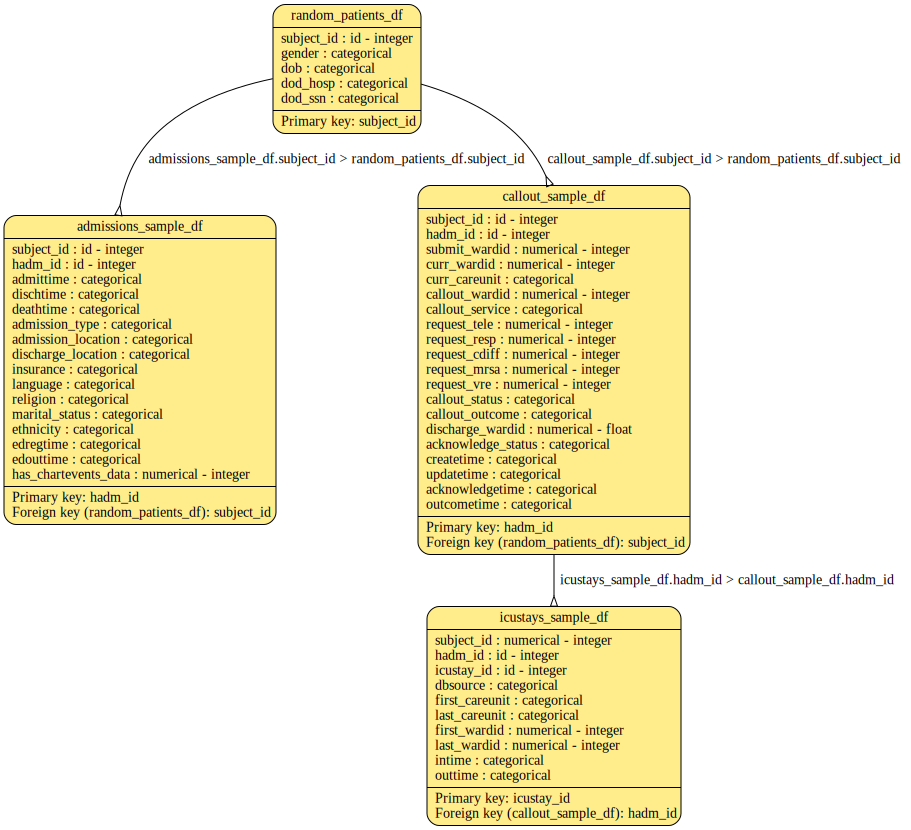

In [48]:
metadata.visualize()

In [49]:
# transactions_fields = {
#     'timestamp': {'type': 'datetime', 'format': '%Y-%m-%d'}
# }

In [50]:
patients_info_model = HMA1(metadata)

In [51]:
patients_info_model.fit(patients_tables)

d:\Environment\anaconda3\envs\msc_project\lib\site-packages\sdv\relational\hma.py:255: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  table.reset_index(inplace=True)


In [60]:
new_data_sample = patients_info_model.sample(num_rows = 500)

d:\Environment\anaconda3\envs\msc_project\lib\site-packages\sdv\relational\base.py:127: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  primary_key_values = pd.Series([x for i, x in zip(range(num_rows), generator)])
d:\Environment\anaconda3\envs\msc_project\lib\site-packages\sdv\relational\base.py:127: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  primary_key_values = pd.Series([x for i, x in zip(range(num_rows), generator)])
d:\Environment\anaconda3\envs\msc_project\lib\site-packages\sdv\relational\base.py:127: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  primary_key_values = pd.Series([x for i, x in zip(range(num_rows), generator)])
d:\Envi

In [53]:
new_data_sample['admissions_sample_df']

,subject_id,hadm_id,admittime,dischtime,deathtime,admission_type,admission_location,discharge_location,insurance,language,religion,marital_status,ethnicity,edregtime,edouttime,has_chartevents_data
0,0,0,1&6&10,4&0&18,2&5&12,EMERGENCY,PHYS REFERRAL/NORMAL DELI,HOME,Private,unknow,CATHOLIC,MARRIED,WHITE,2&1&21,4&6&1,1
1,0,1,1&4&6,3&3&17,2&6&6,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME,Private,unknow,EPISCOPALIAN,MARRIED,BLACK/AFRICAN AMERICAN,2&0&19,4&5&0,1
2,1,2,1&2&8,3&4&15,Na,EMERGENCY,EMERGENCY ROOM ADMIT,HOME,Medicaid,unknow,CATHOLIC,WIDOWED,WHITE,4&5&11,3&5&1,1
3,1,3,1&0&12,2&0&14,Na,EMERGENCY,CLINIC REFERRAL/PREMATURE,SNF,Private,ENGL,CATHOLIC,WIDOWED,WHITE,4&3&17,1&1&3,0
4,2,4,3&4&11,4&1&11,Na,EMERGENCY,PHYS REFERRAL/NORMAL DELI,HOME,Medicaid,ENGL,PROTESTANT QUAKER,SINGLE,BLACK/AFRICAN AMERICAN,2&1&21,1&4&17,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,46,68,3&5&3,4&0&14,Na,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,REHAB/DISTINCT PART HOSP,Private,SPAN,UNOBTAINABLE,unknow,BLACK/AFRICAN AMERICAN,2&1&21,3&1&6,1
69,47,69,4&3&18,4&2&12,Na,EMERGENCY,CLINIC REFERRAL/PREMATURE,HOME,Private,ENGL,UNOBTAINABLE,unknow,WHITE,2&1&21,2&3&15,1
70,47,70,1&3&21,2&1&14,Na,EMERGENCY,EMERGENCY ROOM ADMIT,HOME,Medicaid,PTUN,UNOBTAINABLE,WIDOWED,WHITE,2&1&21,4&0&15,1
71,48,71,1&0&18,2&5&11,2&6&6,EMERGENCY,EMERGENCY ROOM ADMIT,HOME,Medicare,ENGL,NOT SPECIFIED,SINGLE,BLACK/AFRICAN AMERICAN,Na,3&1&21,1


---

<AxesSubplot:>

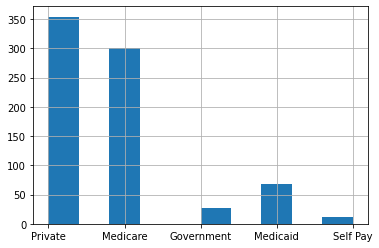

In [63]:
new_data_sample['admissions_sample_df'].insurance.hist()

<AxesSubplot:>

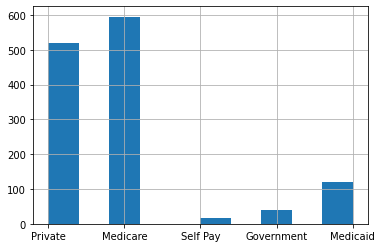

In [64]:
admissions_sample_df.insurance.hist()